## Relatorio de Vendas 05

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('dados\\aluguel_2.csv', sep=';')

In [6]:
dados.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,16.67,Apartamento


In [7]:
dados['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Vista Alegre', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade',
       'Lagoa', 'Santo Cristo', 'Largo do Machado', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Rocha Miranda',
       'Engenho Novo', 'Engenho de Dentro', 'Cidade Nova', 'Pilares',
       'Arpoador', 'Tomás Coelho', 'Água Santa', 'Ilha do Governador',
       'Ja

In [8]:
bairros = ['Copacabana', 'Centro', 'Higienópol','Cascadura', 'Manguinhos', 'Praia da Bandeira', 'Saúde', 'Joá']

In [9]:
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [10]:
dados['Bairro'].unique()

array(['Copacabana', 'Centro', 'Cascadura', 'Manguinhos',
       'Praia da Bandeira', 'Saúde', 'Joá'], dtype=object)

In [11]:
grupo_bairro = dados.groupby('Bairro')

In [12]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [13]:
grupo_bairro.groups

{'Cascadura': [828, 1316, 2439, 2555, 2897, 5505, 6812, 8941, 9677, 10188, 11143, 13077, 13890, 14202, 14281, 15649, 16097, 16533, 17276, 17965, 18049, 18275, 18397, 18656, 19341, 22593, 23563, 24265, 24274, 24334, 24639, 25316, 25843, 26629, 26808, 27871, 29361, 29656, 29661, 30324, 30390, 30658, 32809, 32852], 'Centro': [3, 9, 10, 38, 45, 46, 52, 54, 72, 86, 87, 94, 100, 105, 108, 127, 128, 136, 144, 161, 174, 178, 186, 220, 239, 240, 241, 242, 252, 270, 278, 284, 286, 307, 319, 328, 333, 337, 338, 356, 373, 379, 380, 382, 393, 394, 404, 417, 437, 445, 454, 457, 462, 472, 478, 480, 500, 533, 562, 567, 579, 638, 657, 659, 683, 690, 693, 706, 712, 749, 752, 771, 790, 793, 803, 824, 852, 853, 859, 873, 879, 880, 903, 911, 922, 924, 930, 947, 950, 970, 972, 974, 976, 986, 990, 993, 995, 997, 1006, 1012, ...], 'Copacabana': [0, 13, 14, 15, 33, 34, 39, 43, 58, 123, 132, 152, 162, 189, 196, 209, 210, 213, 215, 219, 226, 243, 250, 262, 273, 285, 290, 303, 329, 371, 398, 418, 421, 426, 438, 4

In [14]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Cascadura -> 1133.1818181818182
Centro -> 19004.972375690606
Copacabana -> 4509.83453689168
Joá -> 16351.6
Manguinhos -> 7312.5
Praia da Bandeira -> 1300.0
Saúde -> 36083.61538461538


In [15]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Cascadura,1133.18,307.91
Centro,19004.97,5247.40
Copacabana,4509.83,1211.94
Joá,16351.60,1770.67
Manguinhos,7312.50,NaN
Praia da Bandeira,1300.00,390.00
Saúde,36083.62,1373.47


## Estatisticas Descritivas

In [16]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Cascadura,44.0,1133.18,551.86,600.0,795.0,1000.0,1250.0,3500.0
Centro,3258.0,19004.97,59355.76,90.0,1000.0,3705.5,15000.0,950000.0
Copacabana,3185.0,4509.83,6413.41,100.0,1900.0,3000.0,4900.0,198000.0
Joá,25.0,16351.60,10358.47,6500.0,7500.0,15000.0,25000.0,45000.0
Manguinhos,8.0,7312.50,3473.75,4000.0,5500.0,6750.0,8000.0,15000.0
Praia da Bandeira,2.0,1300.00,141.42,1200.0,1250.0,1300.0,1350.0,1400.0
Saúde,26.0,36083.62,78362.29,250.0,1400.0,4250.0,27250.0,368474.0


In [17]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Cascadura,600.0,3500.0,49860.0
Centro,90.0,950000.0,61918200.0
Copacabana,100.0,198000.0,14363823.0
Joá,6500.0,45000.0,408790.0
Manguinhos,4000.0,15000.0,58500.0
Praia da Bandeira,1200.0,1400.0,2600.0
Saúde,250.0,368474.0,938174.0


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Medio do Aluguel por Bairro')

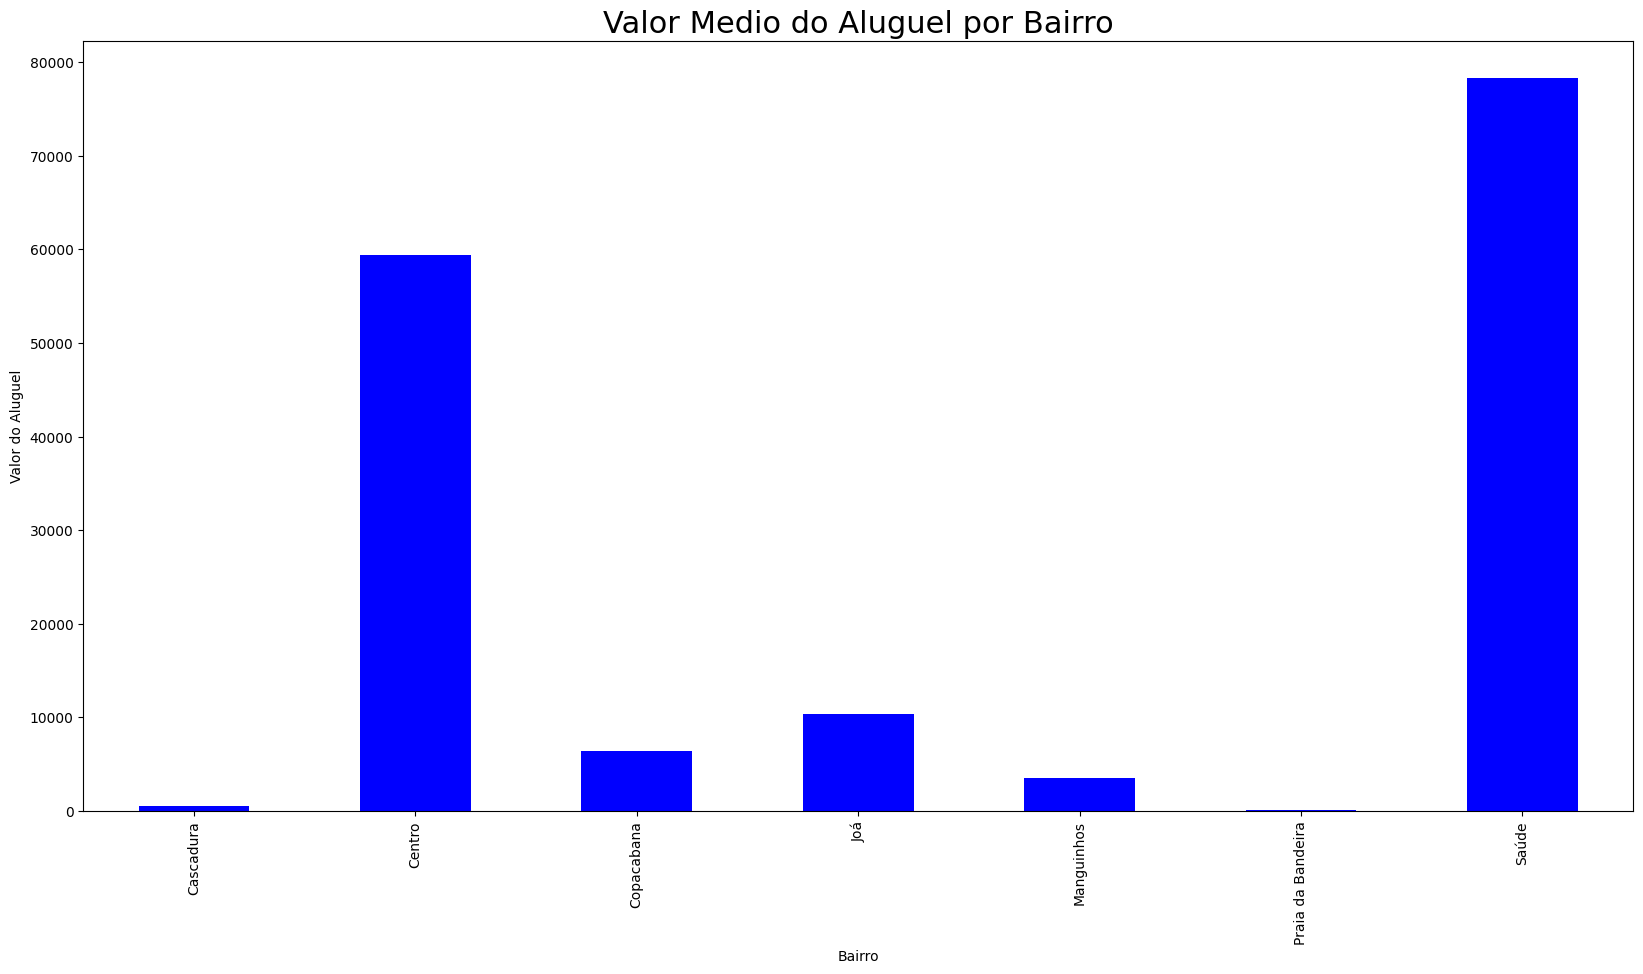

In [22]:
fig = grupo_bairro['Valor'].std().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Medio do Aluguel por Bairro', {'fontsize': 22})